## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import pylab 
%matplotlib inline

In [2]:
df = pd.read_csv("D:\Sanjay\github\Assestments\Instagram-Reach-Prediction\Dataset\instagram_reach.csv")
df.head(2)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23


In [3]:
#df = df.drop("Unnamed: 0", axis=1)
df.head(2)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23


# Checking data

In [4]:
# rows and columns
df.shape

(100, 8)

In [5]:
## column names

In [6]:
df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


### observation :  
All features are seems in correct datatype except "Times since posted"
- Need to change its data type

In [8]:
df.describe()

,Unnamed: 0,S.No,Followers,Likes
count,100.000000,100.000000,100.00000,100.00000
mean,8.940000,16.240000,961.96000,46.48000
std,6.639064,7.384286,1014.62567,55.08698
min,0.000000,1.000000,11.00000,8.00000
25%,4.000000,10.750000,252.75000,19.00000
50%,8.000000,16.500000,612.00000,29.00000
75%,12.250000,22.250000,1197.00000,46.00000
max,26.000000,30.000000,4496.00000,349.00000


## Missing Values

In [9]:
df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

## there are 6 null values in caption 
- since we cant estimate these missing values 
- so simply goint to impute with a blank string


## Checking and correcting datatype

In [10]:
df.dtypes

Unnamed: 0            int64
S.No                  int64
USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted    object
Likes                 int64
dtype: object

In [11]:
df['Time since posted'].head()

0    11 hours
1     2 hours
2     2 hours
3     3 hours
4     3 hours
Name: Time since posted, dtype: object

In [12]:
df['Time since posted'] = df['Time since posted'].str.replace(" hours","")

In [13]:
df['Time since posted']= df['Time since posted'].astype('int64')

In [14]:
df.dtypes

Unnamed: 0            int64
S.No                  int64
USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted     int64
Likes                 int64
dtype: object

In [15]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30


In [16]:
df.dtypes

Unnamed: 0            int64
S.No                  int64
USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted     int64
Likes                 int64
dtype: object

In [18]:
data = df.copy()

In [19]:
type(data)

pandas.core.frame.DataFrame

In [20]:
data.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [21]:
data =data.drop(['S.No','USERNAME',"Caption","Unnamed: 0","Hashtags"], axis=1)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Followers          100 non-null    int64
 1   Time since posted  100 non-null    int64
 2   Likes              100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


## Visualization

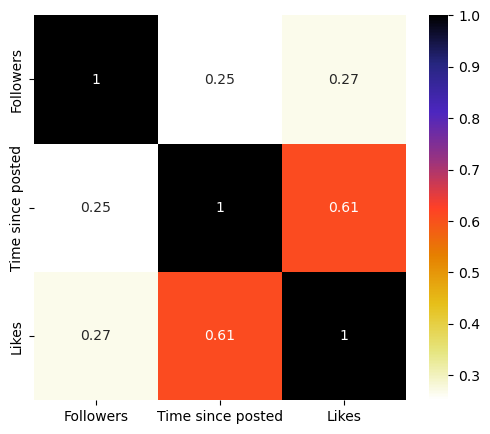

In [23]:
plt.figure(figsize = (6,5))
corr = data.corr()
sns.heatmap(corr, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

Observation :
    

C:\Users\sanjay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Followers', ylabel='Density'>

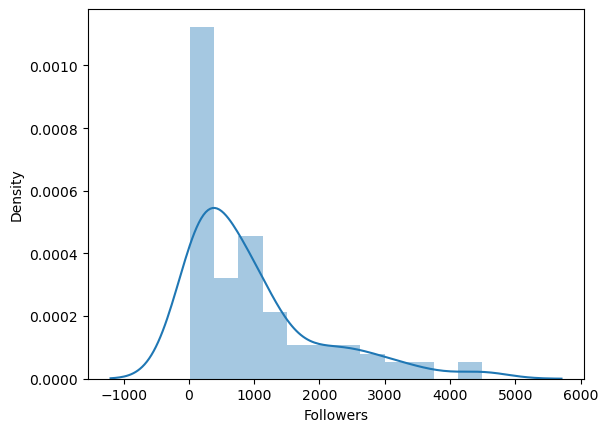

In [25]:
sns.distplot(data["Followers"])

## Model_Training

In [31]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

## preparing X and Y

In [32]:
X= data.drop(columns=['Likes','Time since posted'],axis=1)
y1 = df['Likes']
y2 = df['Time since posted']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X,y1,y2,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y1_train.shape, y1_test.shape, y1_train.shape, y1_test.shape

((80, 1), (20, 1), (80,), (20,), (80,), (20,))

In [34]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [35]:
y_train = np.column_stack((y1_train, y2_train))
y_test = np.column_stack((y1_test, y2_test))

In [37]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
   
}
#model_list = []
#r2_list =[]
model_performance = dict()

for i in range(len(list(models))):
    model = list(models.values())[i]
    y_train = np.column_stack((y1_train, y2_train))
    y_test = np.column_stack((y1_test, y2_test))
    model.fit(X_train, y_train) # Train model
    


    # Make predictions
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    y1_train_pred, y2_train_pred =np.hsplit(y_train_pred, 2)
    y1_test_pred, y2_test_pred = np.hsplit( y_test_pred, 2)
    
    # Evaluate Train and Test dataset
    model_train_mae_y1 , model_train_rmse_y1, model_train_r2_y1 = evaluate_model(y1_train, y1_train_pred)
    model_train_mae_y2 , model_train_rmse_y2, model_train_r2_y2 = evaluate_model(y2_train, y2_train_pred)

    model_test_mae_y1 , model_test_rmse_y1, model_test_r2_y1 = evaluate_model(y1_test, y1_test_pred)
    model_test_mae_y2 , model_test_rmse_y2, model_test_r2_y2 = evaluate_model(y2_test, y2_test_pred)

    
    print(list(models.keys())[i])
    #model_list.append(list(models.keys())[i])
    model_performance[list(models.keys())[i]]= dict()
    
    print('Model performance for Training set y1')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_y1))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae_y1))
    print("- R2 Score: {:.4f}".format(model_train_r2_y1))
    
    print('Model performance for Training set y2')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_y2))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae_y2))
    print("- R2 Score: {:.4f}".format(model_train_r2_y2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_y1))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae_y1))
    print("- R2 Score: {:.4f}".format(model_test_r2_y1))
    
    print('Model performance for Test set y2')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_y2))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae_y2))
    print("- R2 Score: {:.4f}".format(model_test_r2_y2))
    #r2_list.append(model_test_r2)
    model_performance[list(models.keys())[i]]["y1"] = model_test_r2_y1
    model_performance[list(models.keys())[i]]["y2"] = model_test_r2_y2
    
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set y1
- Root Mean Squared Error: 56.5118
- Mean Absolute Error: 33.5100
- R2 Score: 0.0595
Model performance for Training set y2
- Root Mean Squared Error: 3.2489
- Mean Absolute Error: 1.6515
- R2 Score: 0.0637
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 34.4816
- Mean Absolute Error: 25.5902
- R2 Score: 0.1613
Model performance for Test set y2
- Root Mean Squared Error: 3.3768
- Mean Absolute Error: 2.1777
- R2 Score: 0.0210


Lasso
Model performance for Training set y1
- Root Mean Squared Error: 56.5118
- Mean Absolute Error: 33.5100
- R2 Score: 0.0595
Model performance for Training set y2
- Root Mean Squared Error: 3.2489
- Mean Absolute Error: 1.6514
- R2 Score: 0.0637
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 34.4817
- Mean Absolute Error: 25.5906
- R2 Score: 0.1613
Model performance for Test set y2
- Root Mean Squared Error: 3.3768

In [38]:
model_performance

{'Linear Regression': {'y1': 0.16128913504989728, 'y2': 0.021029172852261024},
 'Lasso': {'y1': 0.16128188227722007, 'y2': 0.02100379734224722},
 'Ridge': {'y1': 0.1612891338438842, 'y2': 0.021029172600969037},
 'K-Neighbors Regressor': {'y1': 0.2418614904126789, 'y2': 0.3184803605924018},
 'Decision Tree': {'y1': 0.8695355444219304, 'y2': 0.12856836230950863},
 'Random Forest Regressor': {'y1': 0.7823174562881003,
  'y2': 0.5974515163249245},
 'XGBRegressor': {'y1': 0.8741099815238419, 'y2': 0.11810316421629108}}

In [42]:
## Selecting Random Forest
rf_model =  RandomForestRegressor()

In [43]:
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [44]:
# hyperparementer tuning using grid search cv 
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = rf_model, param_grid = grid_param, cv =3, verbose =1, n_jobs=-1)

In [45]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 20736 candidates, totalling 62208 fits


KeyboardInterrupt: 